     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

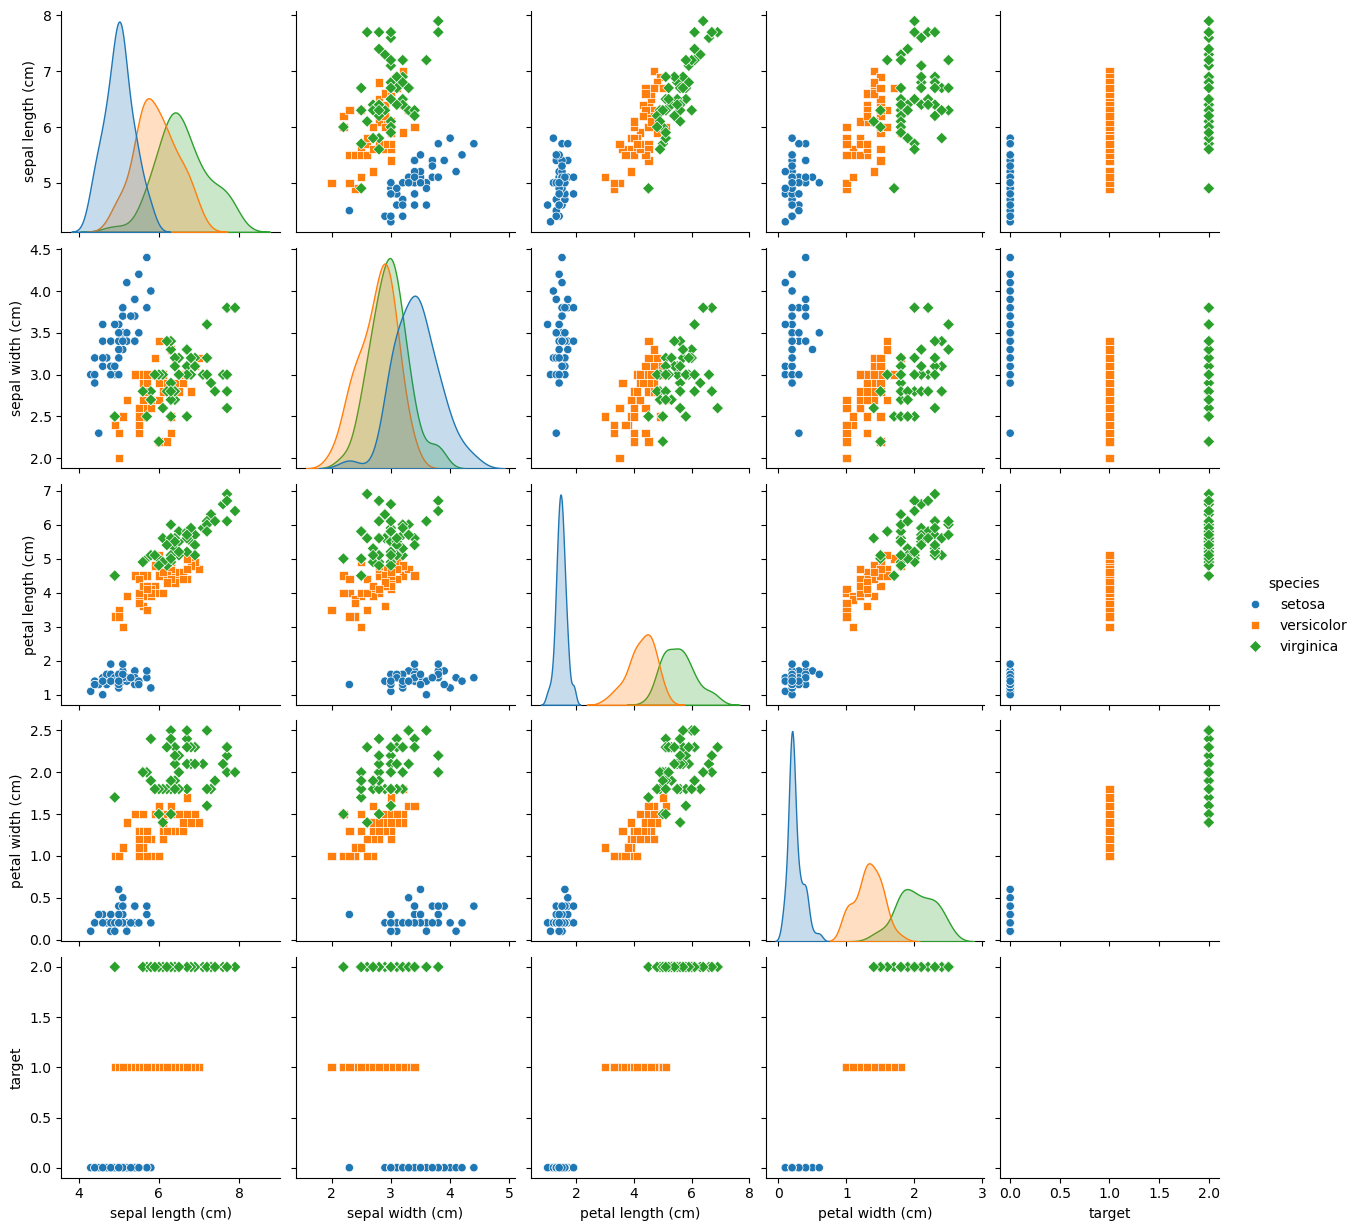

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.86      0.92        14
           2       0.88      1.00      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

Confusion Matrix:
 [[17  0  0]
 [ 0 12  2]
 [ 0  0 14]]
Accuracy Score: 0.9555555555555556
The optimal number of neighbors is 9.


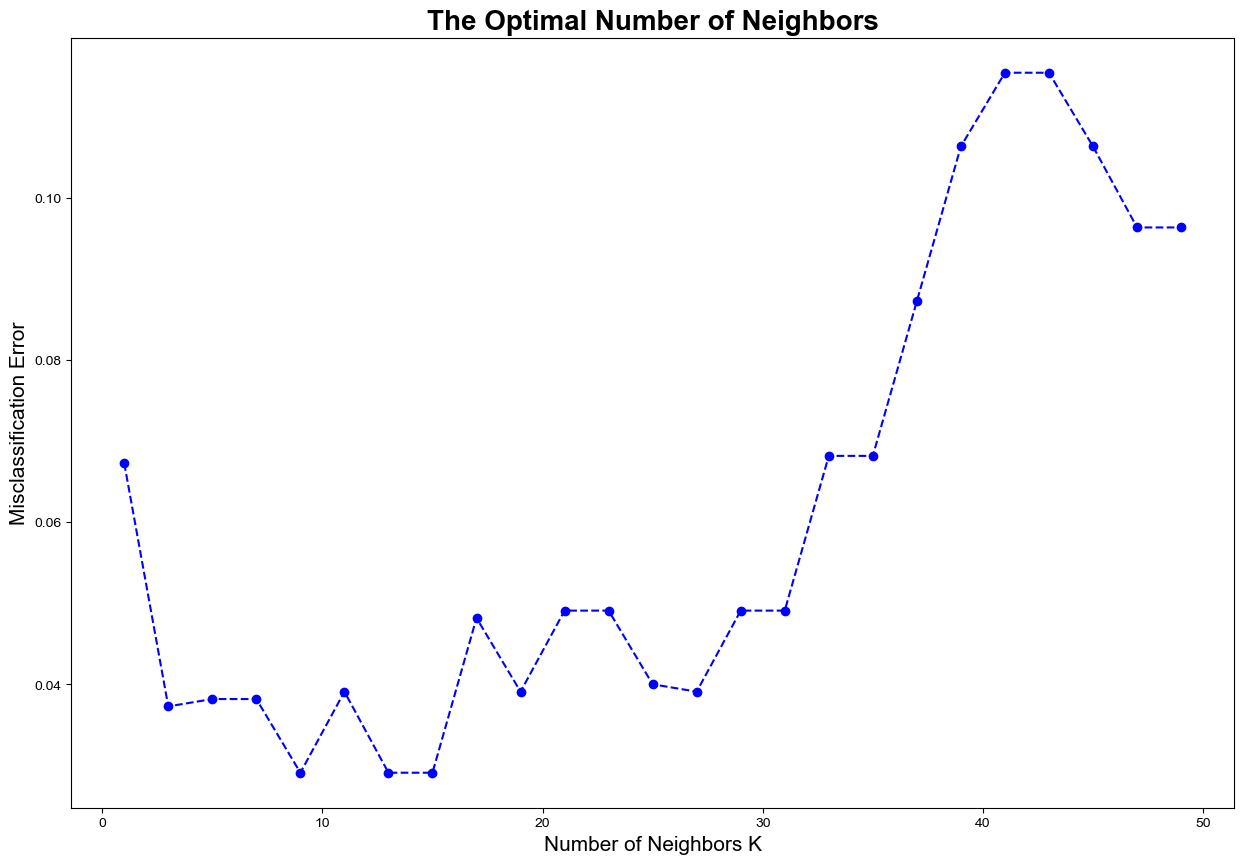

In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Data Loading
iris = load_iris(as_frame=True)
df = iris.frame  # Convert to Pandas DataFrame
print(df)

# Add species names
df["species"] = df["target"].map(dict(enumerate(iris.target_names)))
df.head()

# Visualizing the dataset
sns.pairplot(df, hue="species", markers=["o", "s", "D"])
plt.show()


# Use the correct column names with underscores
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df['target']

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Fitting K-NN classifier to the training set
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) #euclidean, manhattan, minkowski, mahalanobis
knn.fit(X_train, y_train)

# Making predictions
predictionsKNN = knn.predict(X_test)

# Evaluation
print('Classification Report:\n', classification_report(y_test, predictionsKNN))
print('Confusion Matrix:\n', confusion_matrix(y_test, predictionsKNN))
print('Accuracy Score:', accuracy_score(y_test, predictionsKNN))

# Finding the optimal K using cross-validation
k_list = list(range(1, 50, 2))
cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Changing to misclassification error
MSE = [1 - x for x in cv_scores]

# Plotting
plt.figure(figsize=(15, 10))
plt.title('The Optimal Number of Neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE, marker='o', linestyle='dashed', color='b')

# Finding the best k
best_k = k_list[MSE.index(min(MSE))]
print(f"The optimal number of neighbors is {best_k}.")


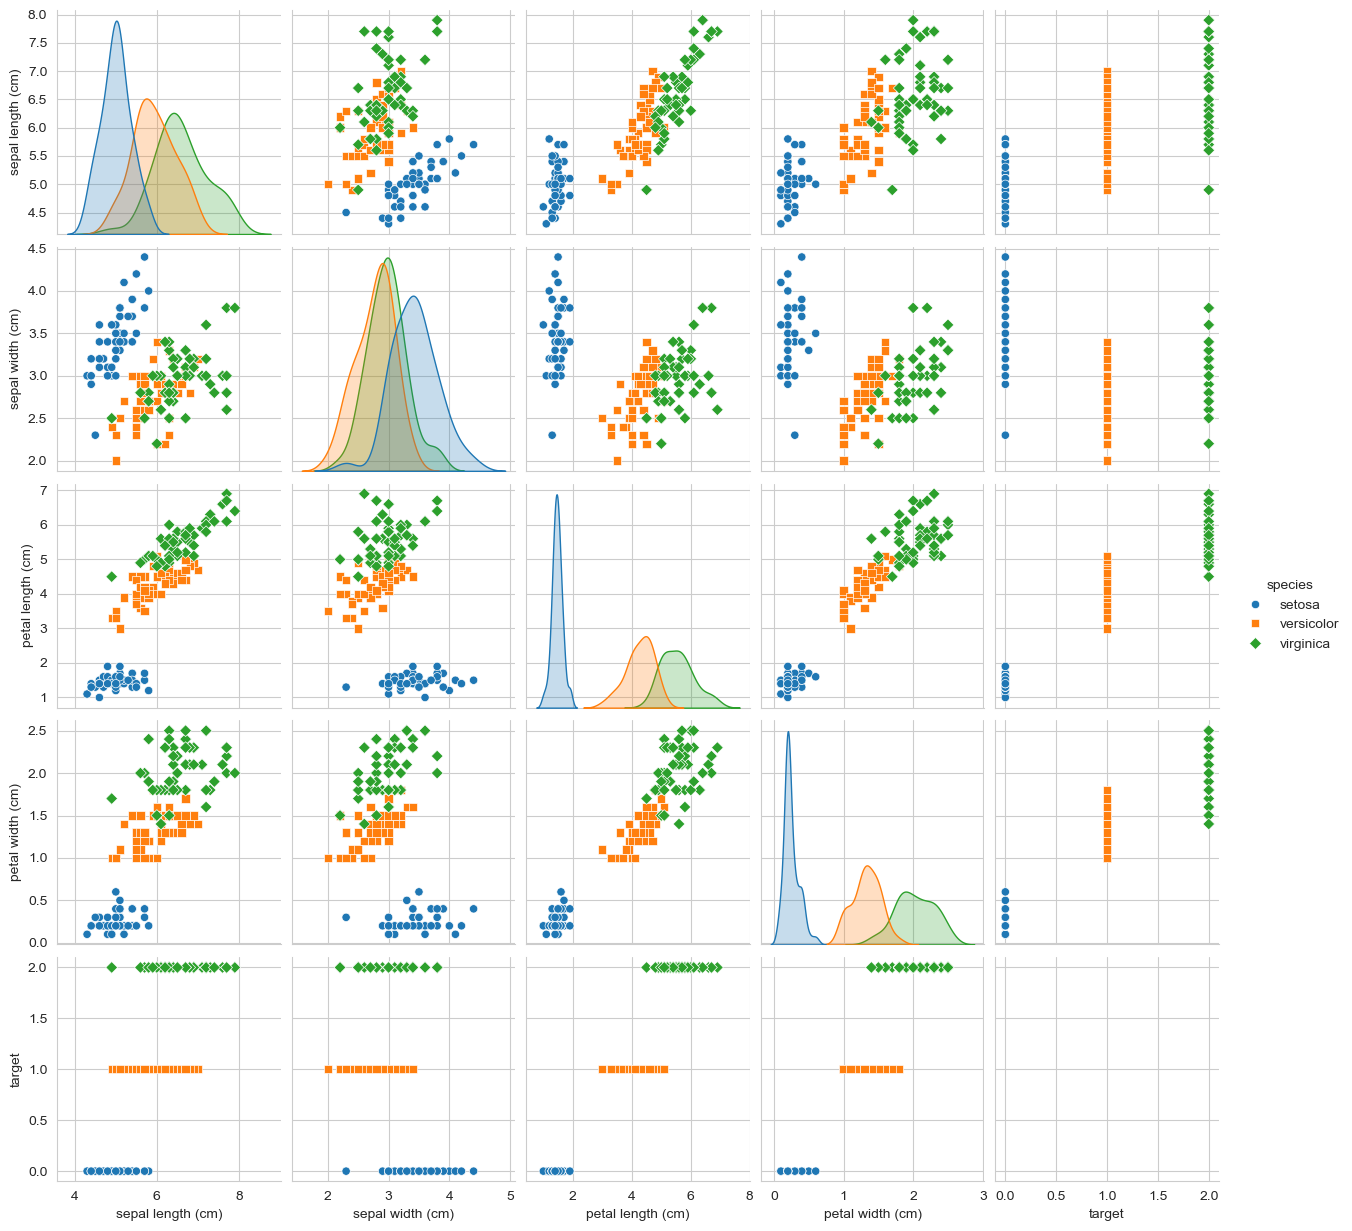


Evaluating KNN with Euclidean Distance:

Euclidean Distance:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.86      0.92        14
           2       0.88      1.00      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

Confusion Matrix:
 [[17  0  0]
 [ 0 12  2]
 [ 0  0 14]]
Accuracy (Before CV): 0.9556
Cross-Validation Accuracy Scores: [1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
Accuracy (After CV): 0.9667
Standard Deviation: 0.0447

Evaluating KNN with Manhattan Distance:

Manhattan Distance:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      0.86      0.89        

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the Iris dataset
iris = load_iris(as_frame=True)
df = iris.frame  # Convert to Pandas DataFrame

# Add species names
df["species"] = df["target"].map(dict(enumerate(iris.target_names)))

# Visualizing the dataset
sns.pairplot(df, hue="species", markers=["o", "s", "D"])
plt.show()

# Define feature matrix (X) and target vector (y)
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df['target']

# Split data into training and testing sets (without cross-validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Define different K-NN classifiers
knn_metrics = {
    "Euclidean": {"metric": "euclidean"},
    "Manhattan": {"metric": "manhattan"},
    "Minkowski": {"metric": "minkowski", "p": 2}
}

# Evaluation function for KNN with different metrics
def evaluate_knn(knn, X_train, X_test, y_train, y_test, metric_name):
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    
    # Evaluation
    print(f"\n{metric_name} Distance:")
    print('Classification Report:\n', classification_report(y_test, predictions))
    print('Confusion Matrix:\n', confusion_matrix(y_test, predictions))
    print(f'Accuracy (Before CV): {accuracy:.4f}')

    # Cross-validation evaluation
    cv_scores = cross_val_score(knn, X, y, cv=10)
    accuracy_cv = cv_scores.mean()
    print(f'Cross-Validation Accuracy Scores: {cv_scores}')
    print(f'Accuracy (After CV): {accuracy_cv:.4f}')
    print(f'Standard Deviation: {cv_scores.std():.4f}')

# Evaluate K-NN with different distance metrics
for name, params in knn_metrics.items():
    print(f"\nEvaluating KNN with {name} Distance:")
    knn = KNeighborsClassifier(n_neighbors=5, **params)
    evaluate_knn(knn, X_train, X_test, y_train, y_test, name)

# ---------------------------------
# Hyperparameter Tuning using GridSearchCV with distance metrics
param_grid = {
    'n_neighbors': range(1, 11),
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=15, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

# Best parameters and accuracy from Grid Search
print("\nGrid Search Best Parameters:", grid_search.best_params_)
print(f'Best Accuracy from Grid Search: {grid_search.best_score_:.4f}')
